<a href="https://colab.research.google.com/github/nadhimmna/Tugas-Machine-Learning/blob/main/Tugas%20Minggu%209/Tugas_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama       : Muhammad Nadhim Abdirrahman
* NIM        : 1103210018
* Dataset    : housepricedata.csv
* Model      : Neural Network

In [4]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Mounting google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
url = "/content/drive/MyDrive/Machine Learning/housepricedata.csv"
# Membaca file CSV dan membuat DataFrame
df = pd.read_csv(url)
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


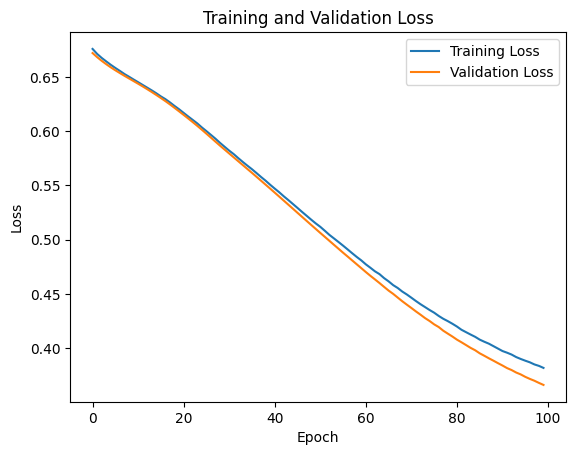

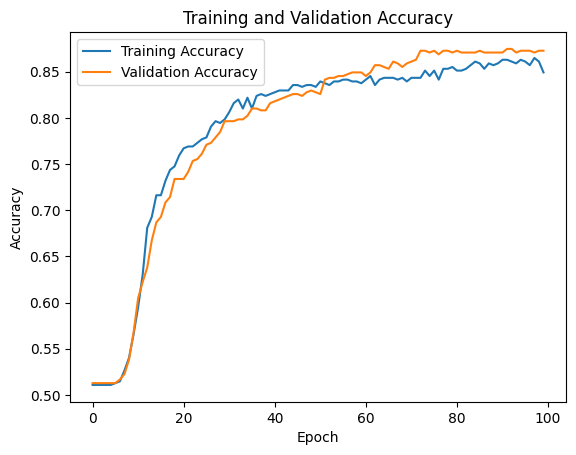

In [6]:
# Memisahkan fitur dan target variabel
X = df.drop(columns=['AboveMedianPrice'])  # Fitur-fitur disimpan dalam variabel X
y = df['AboveMedianPrice']  # Target variabel disimpan dalam variabel y

# Normalisasi fitur
scaler = MinMaxScaler()  # Inisialisasi MinMaxScaler
X_scaled = scaler.fit_transform(X)  # Normalisasi fitur-fitur dalam X

# Pembagian data menjadi set pelatihan, validasi, dan pengujian
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # Pembagian data menjadi set pelatihan dan pengujian
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)  # Pembagian data pelatihan menjadi set pelatihan dan validasi

# Mendefinisikan arsitektur model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Lapisan tersembunyi dengan 32 neuron dan fungsi aktivasi ReLU
    Dense(32, activation='relu'),  # Lapisan tersembunyi kedua dengan 32 neuron dan fungsi aktivasi ReLU
    Dense(1, activation='sigmoid')  # Lapisan output dengan satu neuron dan fungsi aktivasi sigmoid
])

# Kompilasi model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])  # Kompilasi model dengan pengoptimal SGD dan fungsi kerugian binary_crossentropy

# Pelatihan model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)  # Pelatihan model menggunakan data pelatihan

# Visualisasi hasil pelatihan
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss pelatihan
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validasi
plt.xlabel('Epoch')  # Label sumbu X
plt.ylabel('Loss')  # Label sumbu Y
plt.title('Training and Validation Loss')  # Judul plot
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi pelatihan
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validasi
plt.xlabel('Epoch')  # Label sumbu X
plt.ylabel('Accuracy')  # Label sumbu Y
plt.title('Training and Validation Accuracy')  # Judul plot
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot
